In [69]:
import pandas as pd


In [70]:
df = pd.read_csv("salario_profissionais_dados.csv")

In [71]:
df.head()
#Vizualização de colunas 

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [72]:
df.shape
#Proporção da base

(3755, 10)

In [73]:
df.info()
#Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [74]:
df.isnull().sum()
#Verificação de nulos

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64

In [ ]:
df.value_counts(normalize=True).head(20)
#Já podemos vizualizar que a média dos maiores salarios são:
#Nos cargos de Data Scientist e Data Engineer;
#No nível de experiencia mais frequente é o Sênior com a média de 6 anos de experiência;
#E o tamanho da empresa é médio.

work_year  country                   region    experience_level  job_title                  salary_in_usd  employee_residence  company_location  company_size  years_of_experience
2022       United States of America  Americas  SE                Data Scientist             141525         US                  US                M             6                      0.002929
2023       United States of America  Americas  SE                Data Engineer              160000         US                  US                M             6                      0.002663
2022       United States of America  Americas  SE                Data Scientist             141525         US                  US                M             7                      0.002397
                                                                 Data Engineer              130000         US                  US                M             7                      0.002130
                                                         

In [76]:
df.groupby('company_size')['salary_in_usd'].mean()
#Média dos valores

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

In [77]:
df.groupby('company_size')['salary_in_usd'].median()
#Mediana dos valores

company_size
L    108500.0
M    140000.0
S     62146.0
Name: salary_in_usd, dtype: float64

In [78]:
print("Desvio padrão:", df['salary_in_usd'].std())

print("Mínimo:", df['salary_in_usd'].min())

print("Máximo:", df['salary_in_usd'].max())

Desvio padrão: 63055.625278224084
Mínimo: 5132
Máximo: 450000


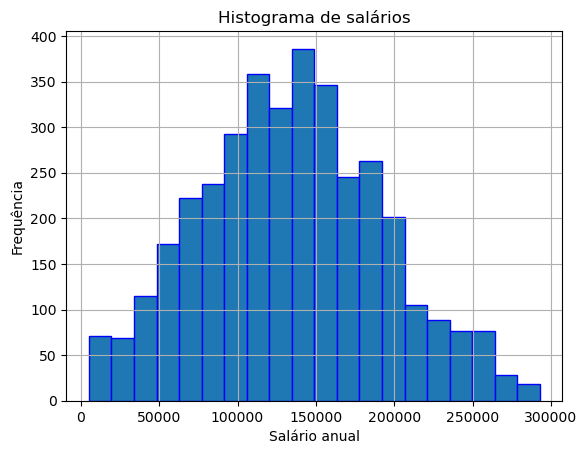

In [79]:
import matplotlib.pyplot as plt

Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['salary_in_usd'] >= limite_inferior) & (df['salary_in_usd'] <= limite_superior)]

df['salary_in_usd'].hist(bins=20, edgecolor='blue')

plt.title('Histograma de salários')
plt.xlabel('Salário anual')
plt.ylabel('Frequência')
plt.show()

#Foi feita retirada de outliers para melhor vizualização gráfica
#Podemos perceber que a maior frequência de salários está entre 10 a 15 mil

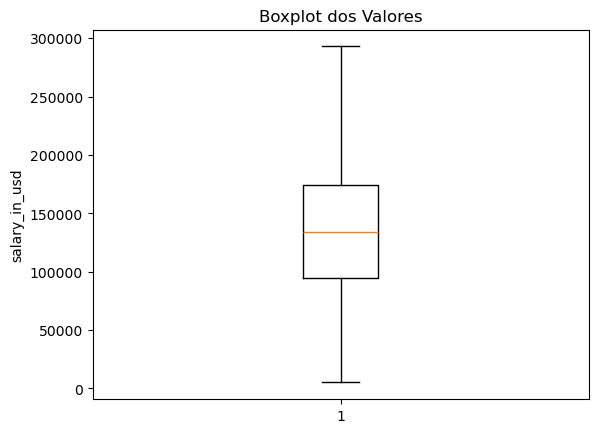

In [80]:
plt.boxplot(df['salary_in_usd'])
plt.title('Boxplot dos Valores')
plt.ylabel('salary_in_usd')
plt.show()
#Aqui vemos novamente que a média tende próxima a 15 mil

In [ ]:
mdf = df.groupby("country")["salary_in_usd"].mean()

mdf.sort_values(ascending=False).head(10)

#Top 10 paises com salários mais altos

country
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    149237.188519
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.428571
Dominican Republic          110000.000000
Russian Federation          105750.000000
Name: salary_in_usd, dtype: float64

In [ ]:
print(df[["salary_in_usd", "work_year", "years_of_experience"]].corr())

#Vemos que os anos de experiência possuem uma relação moderada com o salário

                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.250661             0.421085
work_year                 0.250661   1.000000             0.178452
years_of_experience       0.421085   0.178452             1.000000
